Le Lorem Ipsum est simplement du faux texte employé dans la composition et la mise en page avant impression. Le Lorem Ipsum est le faux texte standard de l'imprimerie depuis les années 1500, quand un peintre anonyme assembla ensemble des morceaux de texte pour réaliser un livre spécimen de polices de texte. Il n'a pas fait que survivre cinq siècles, mais s'est aussi adapté à la bureautique informatique, sans que son contenu n'en soit modifié. Il a été popularisé dans les années 1960 grâce à la vente de feuilles Letraset contenant des passages du Lorem Ipsum, et, plus récemment, par son inclusion dans des applications de mise en page de texte, comme Aldus PageMaker.

# Cubic Spline

We consider here a cubic spline passing through the points $(x_i,y_i)$ with $a=x_1<\ldots<x_n=b$, that is, a class function ${\mathcal C}^2$ on $[a, b]$ and each restriction at the interval $[x_{i-1},x_i]$, $1\leq i\leq n$, is a polynomial of degree less than 3. We will note $S$ such a spline. His equation is given by

$$
S_i(x) =  Ay_i + By_{i+1} + Cy''_i+ D y''_{i+1}, \qquad x_{i}\leq x\leq x_{i+1},
$$

where

$$
A = \frac{x_{i+1}-x}{x_{i+1} - x_i} \qquad \text{et} \qquad B = \frac{x-x_i}{x_{i+1} - x_i},
$$

$$
C = \frac{1}{6}\left(A^3-A\right)\left(x_{i+1}-x_i\right)^2 \qquad \text{et} \qquad D = \frac{1}{6}\left(B^3-B\right)\left(x_{i+1}-x_i\right)^2.
$$

If we derive this equation twice with respect to $x$, we get

$$
\frac{d^2S(x)}{d x} = Ay''_i + By''_{i+1}.
$$

Since $A = 1$ in $x_i$ and $A = 0$ in $x_ {i + 1}$ and conversely for $B$, we can see that the second derivative is continuous at the interface of the two intervals $[x_{i-1}, x_{i}]$ and $[x_{i}, x_{i + 1}]$.

It remains to determine the expression of $y''_i$. To do this, we will calculate the first derivative and impose that it is continuous at the interface of two intervals. The first derivative is given by

$$
\frac{dy}{dx}=\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}-\frac{3A^2-1}{6}(x_{i+1}-x_{i})y''_i+\frac{3B^2-1}{6}(x_{i+1}-x_{i})y''_{i+1}.
$$

We therefore want the value of the first derivative in $x = x_i$ over the interval $[x_{i-1}, x_{i}]$ to be equal to the value of the first derivative in $x = x_i$ over the interval $[x_{i}, x_{i + 1}]$; which gives us for $i = 2, \dots, n-1$

$$
a_iy''_{i-1}+b_iy''_i+c_iy''_{i+1}=d_i,
$$

with

$$
\begin{array}{l}
    a_i = \frac{x_i-x_{i-1}}{x_{i+1}-x_{i-1}}\\
    b_i = 2\\
    c_i = \frac{x_{i+1}-x_{i}}{x_{i+1}-x_{i-1}}\\
    d_i = \frac{6}{x_{i+1}-x_{i-1}}\left(\frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}-\frac{y_{i}-y_{i-1}}{x_{i}-x_{i-1}}\right).
    \end{array}
$$

So we have $n-2$ linear equations to calculate the $n$ unknowns $y''_i$ for $i = 1, \dots, n$. So we have to make a choice for the first and last values and we will take them equal to zero. We can recognize the resolution of a system with a tridiagonal matrix. It is then easy to solve it by using the algorithm of Thomas which one recalls the principle

$$
c'_i=\left\{ 
    \begin{array}{lr}
    \frac{ci}{b_i}&i=1\\
    \frac{c_i}{b_i-a_ic'_{i-1}}&i=2,\dots,n.
    \end{array}
    \right.
$$

$$
d'_i=\left\{ 
    \begin{array}{lr}
    \frac{di}{b_i}&i=1\\
    \frac{d_i-a_id'_{i-1}}{b_i-a_ic'_{i-1}}&i=2,\dots,n.
    \end{array}
    \right.
$$

The solution is then obtained by the formula

$$
\begin{array}{l}
    y''_n = d'_n \\
    y''_i = d'_i-c'_iy''_{i+1} \qquad \text{pour} \qquad i=n-1,\dots,1.
    \end{array}
$$

# Quelques citations

<cite data-cite="ARN">(Arnold, Vladimir I., 1978)</cite>, <cite data-cite="LL">(J. Leray and J-L. Lions, 1965)</cite>

# Example

You can find an example on the Figure (\ref{fig:spline}).

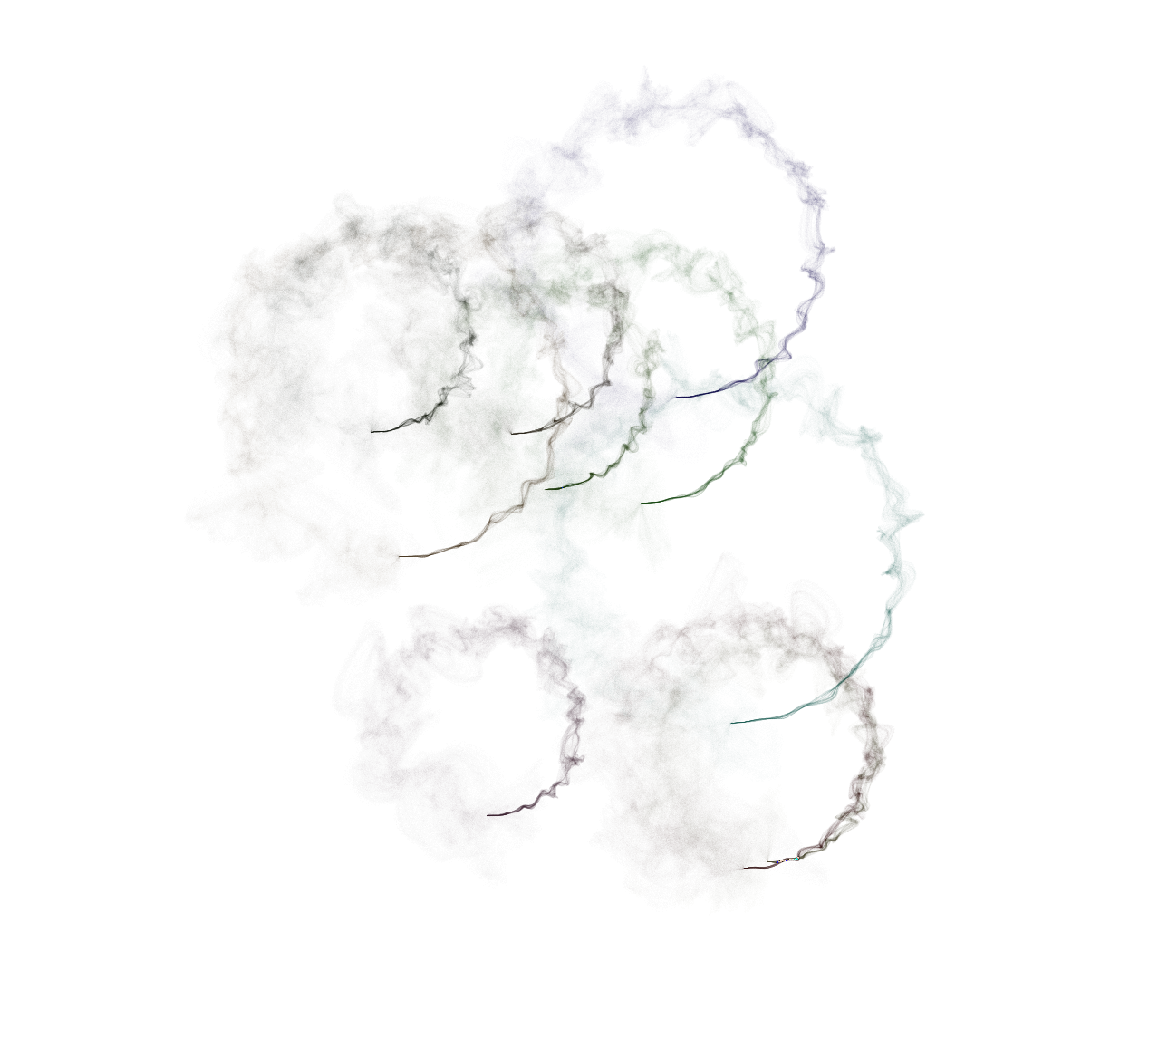

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from six.moves import range
import splinart as spl

img_size, channels = 1000, 4
img = np.ones((img_size, img_size, channels), dtype=np.float32)
np.random.seed(42)
    
nb_circles = 10
theta_circles = []
path_circles = []
color_circles = []
for i in range(nb_circles):
    radius = .1 + np.random.random()*.1
    center = .2 + np.random.random(2)*.6
    theta, path = spl.circle(center, radius, npoints=75)
    theta_circles.append(theta)
    path_circles.append(path)
    color = np.random.random(4)*.3
    color[-1] = 1.
    color_circles.append(color)

def xs_func():
    nsamples = 500
    return (np.random.random() + 2 * np.pi * np.linspace(0, 1, nsamples))%(2*np.pi)

for i in range(nb_circles):
    img1 = np.ones_like(img)
    spl.update_img(img1, path_circles[i], xs_func, nrep=1000, scale_value=.00005, x=theta_circles[i], color=color_circles[i])
    mask = img1 < 1.
    img[mask] += img1[mask]

plt.figure(dpi=300)
plt.axes().set_aspect('equal')
plt.axis('off')
plt.imshow(img)
plt.show()